# Naive Bayes classifier#

A naive Bayes classifier is a simple probabilistic classifier based on the application of Bayes' theorem (from Bayesian statistics) with (naïve) assumptions of independence. Simply put, a naive Bayesian classifier assumes that the presence (or absence) of a certain feature of an object is unrelated to the presence (or absence) of any other feature.

For example, a fruit can be considered an apple if it is red, round and about ten centimeters in diameter. Even if these features of an apple depend on each other or on the existence of other features, a naive Bayesian classifier believes that all these features independently contribute to the fact that this fruit is classified as an apple.

# Import packages and data from Kaggle

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

In [2]:
# Importing data
data = pd.read_csv('creditcard.csv')

# Data processing and Exploratory Data Analysis (EDA)

**Data overview**

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Check for Null / missing values**

In [6]:
# Percentage of missing values in each column
round(100 * (data.isnull().sum() / len(data)), 3).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# Percentage of missing values in each row
round(100 * (data.isnull().sum(axis=1) / len(data)), 3).sort_values(ascending=False)

0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

There are no Null / missing values in columns or rows

**Duplicate check**

In [8]:
data_1 = data.copy()
data_1.drop_duplicates(subset=None, inplace=True)

In [9]:
data.shape

(284807, 31)

In [10]:
data_1.shape

(283726, 31)

It appears that duplicate are found

In [11]:
data = data_1
del data_1

**Exploring the shape and features of the data**

In [12]:
number_of_non_fraudulent_cases = data[data.Class == 0]
number_of_fraudulent_cases = data[data.Class == 1]
non_fraudulent_percentage = round(100 * (len(number_of_non_fraudulent_cases) / len(data)), 3)
fraudulent_percentage = round(100 * (len(number_of_fraudulent_cases) / len(data)), 3)

print('Number of cases in dataset: ', len(data))
print('Number of non-fraudulent cases in dataset:', len(number_of_non_fraudulent_cases))
print('Number of fraudulent cases in dataset: ', len(number_of_fraudulent_cases))
print('Percentage of non-fraudulent cases in dataset: ', non_fraudulent_percentage)
print('Percentage of fraudulent cases in dataset: ', fraudulent_percentage)

Number of cases in dataset:  283726
Number of non-fraudulent cases in dataset: 283253
Number of fraudulent cases in dataset:  473
Percentage of non-fraudulent cases in dataset:  99.833
Percentage of fraudulent cases in dataset:  0.167


**Statistical view of both fraud and non-fraud transaction amount data**

In [13]:
print('Statistical view of non-fraudulent cases')
print(number_of_non_fraudulent_cases.Amount.describe())
print('')

print('Statistical view of fraudulent cases')
print(number_of_fraudulent_cases.Amount.describe())

Statistical view of non-fraudulent cases
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

Statistical view of fraudulent cases
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


# Data Preparation

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). While looking through the Statistical description of the features of the Credit Card sample dataset.It is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python. Now let’s drop the time feature. That does not have relevance in making classifications and just logs time… Then, we can split the data into training and testing values with a test size of 30%.We drop the features Time because of useless.

**Data normalization**

In [14]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data.drop('Time', axis=1, inplace=True)

data['Amount'].head(10)

0    0.244200
1   -0.342584
2    1.158900
3    0.139886
4   -0.073813
5   -0.338670
6   -0.333399
7   -0.190387
8    0.018879
9   -0.338630
Name: Amount, dtype: float64

**Independent Variable and Dependent Variable**

In [15]:
n = 80000
X = data.drop('Class', axis=1)
X = X.iloc[:n]
Y = data['Class']
Y = Y.iloc[:n]

In [16]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338670
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333399
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190387
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.018879
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338630


In [17]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

**Split the data**

In [18]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# Select categorical columns
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if
                  X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply label encoder to prediction target with categorical data
my_imputer = LabelEncoder()
Y_train = my_imputer.fit_transform(Y_train)
Y_valid = my_imputer.transform(Y_valid)

**Random under-sampling**

In [19]:
balance = RandomUnderSampler()
X_balanced, Y_balanced = balance.fit_resample(X_train, Y_train)

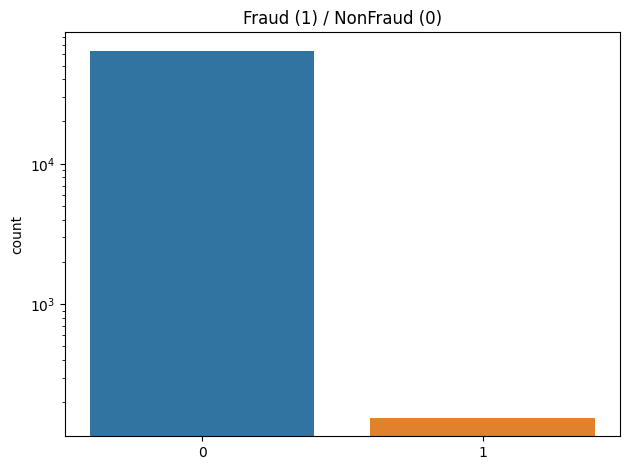

In [20]:
ax = plt.figure().add_subplot(111)
ax.set_title('Fraud (1) / NonFraud (0)', color='black')
sns.countplot(x=Y_train)
ax.set_yscale('log')
ax.plot()
plt.tight_layout()

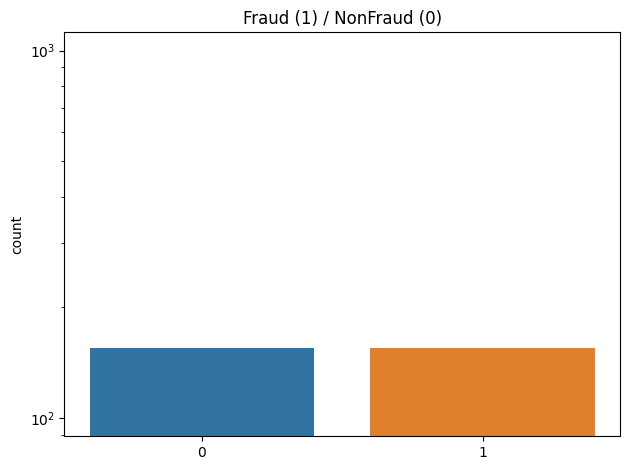

In [21]:
ax = plt.figure().add_subplot(111)
ax.set_title('Fraud (1) / NonFraud (0)', color='black')
sns.countplot(x=Y_balanced)
ax.set_yscale('log')
ax.plot()
plt.tight_layout()

# Naive Bayes classifier

**Initial structure of the Bayesian network**

In [22]:
model = GaussianNB()

**Model training**

In [23]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, Y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

**Conclusion**

In [24]:
def plot_graph(data):
    fig, axes = plt.subplots(1, 2)

    yes_per = len(data[data == 1]) / len(data) * 100
    no_per = len(data[data == 0]) / len(data) * 100

    sns.countplot(x=data, ax=axes[0])
    axes[1].pie([yes_per, no_per], labels=['Y', 'N'], autopct='%1.1f%%')
    plt.show()

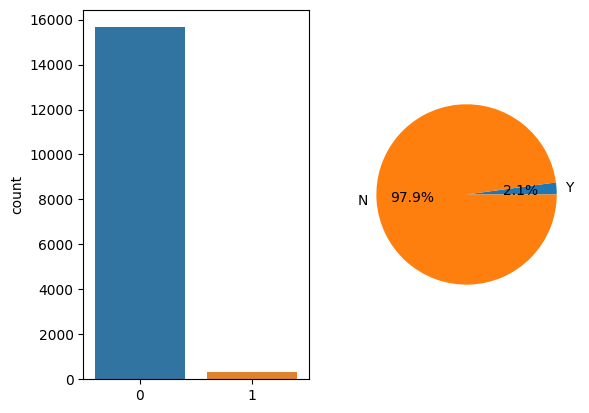

In [25]:
plot_graph(preds)

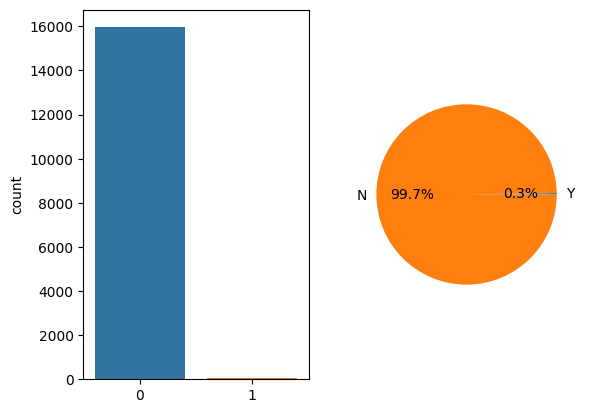

In [26]:
plot_graph(Y_valid)

**Matrix of inconsistencies**

Let's determine the main indicators that we will use to evaluate the classification models. Let's generalize our "loan prediction" model using a 2x2 mismatch matrix that displays all four possible outcomes:

In [27]:
def plot_confusion_matrix2(cm, classes, title='Matrix of inconsistencies', cmap=plt.cm.Blues):
    plt.figure()
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True negative', 'False positive', 'False negative', 'True positive']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.show()

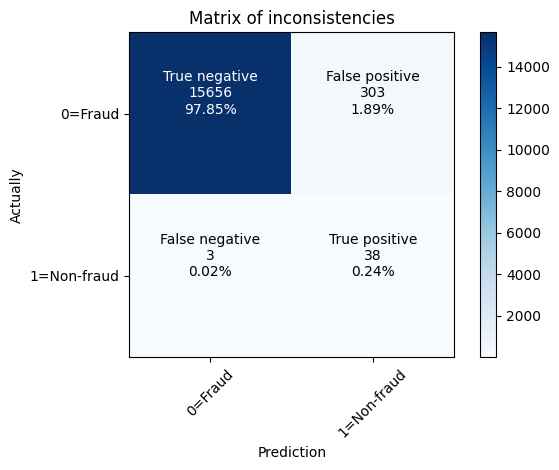

In [28]:
cm = confusion_matrix(Y_valid, preds)
plot_confusion_matrix2(cm=cm, classes={'Fraud':0, 'Non-fraud':1}, )

**Quality metrics**

**Accuracy**

Accuracy is one of the metrics for evaluating classification models

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

For binary classification, accuracy can also be calculated in terms of positive and negative rates as follows:

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} = \frac{40+7}{40+7+14+1} \approx 0.76
$$

**Precision**

Precision tries to answer the following question: "What proportion of positive predictions were actually correct?"

Accuracy is defined as follows:
$$
\text{Precision} = \frac{TP}{TP+FP} = \frac{40}{40+14} \approx 0.74
$$

Our model has an accuracy of 0.74, in other words, when it predicts that the loan decision is favorable, it is correct 74% of the time.

**Recall**

Recall tries to answer the following question: What proportion of actual positives was determined correctly?

$$
\text{Recall} = \frac{TP}{TP+FN} = \frac{40}{40 + 1} \approx 0.98
$$

Our model has a completeness of 0.98, in other words, it correctly identifies 98% of all acceptable decisions.

In [29]:
# Evaluate the model
acc  = accuracy_score(Y_valid, preds)
pre  = precision_score(Y_valid, preds)
rec  = recall_score(Y_valid, preds)
f1   = f1_score(Y_valid, preds)
loss = log_loss(Y_valid, preds)

print('Accuracy: ', acc)
print('Precision:', pre)
print('Recall:   ', rec)
print('F1 score: ', f1)
print('Log loss: ', loss)

Accuracy:  0.980875
Precision: 0.11143695014662756
Recall:    0.926829268292683
F1 score:  0.19895287958115182
Log loss:  0.6893348710668656


**Cross-validation score**

Cross-validation provides a more accurate assessment of model quality.

In [30]:
acc_scores = cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='accuracy')
prec_scores = cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='precision')
rec_scores = cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='recall')
f1_scores = cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='f1')
log_losses = -1 * cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='neg_log_loss')

print('Accuracy score: ', acc_scores.mean())
print('Precision score:', prec_scores.mean())
print('Recall score:   ', rec_scores.mean())
print('F1 score:       ', f1_scores.mean())
print('Log loss:       ', log_losses.mean())

Accuracy score:  0.9807343749999999
Precision score: 0.09936265729237846
Recall score:    0.8580645161290322
F1 score:        0.17798238454131732
Log loss:        0.5068110079267748


**ROC Curve and AUC**

An ROC curve (receiver operating characteristic curve) is a graph showing the quality of a classification model at all classification thresholds. This curve displays two parameters:

     True Positive Rate
     False positive rate

The true positive rate (TPR) is synonymous with completeness and is therefore defined as follows:
$$ TPR = \frac{TP} {TP + FN} $$

The false positive rate (FPR) is defined as follows:
$$ FPR = \frac{FP} {FP + TN} $$

The ROC curve displays the ratio of TPR and FPR at different classification thresholds. Lowering the classification threshold allows more items to be classified as positive, thereby increasing the number of false positives and true positives. The following figure shows the ROC curve.

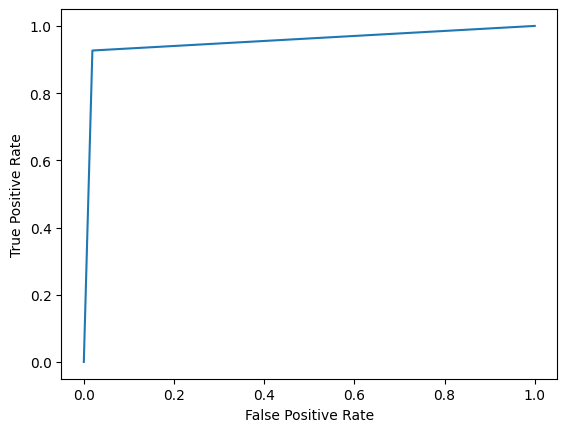

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15959
           1       0.11      0.93      0.20        41

    accuracy                           0.98     16000
   macro avg       0.56      0.95      0.59     16000
weighted avg       1.00      0.98      0.99     16000



In [31]:
fpr, tpr, _ = roc_curve(Y_valid, preds)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

roc_display.plot()
plt.show()

print(classification_report(Y_valid, preds, ))

In [32]:
print('AUC:', auc(fpr, tpr))

AUC: 0.9539215581390729
